# argo_seasonality

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [2]:
import filt_funcs as ff
import EKE_funcs as ef

In [3]:
so_ds=xr.open_dataset("202206_lon:(25,45)_lat:(-60,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)

(array([32., 29., 30., 33., 35., 28., 29., 21., 22., 18., 25., 33.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

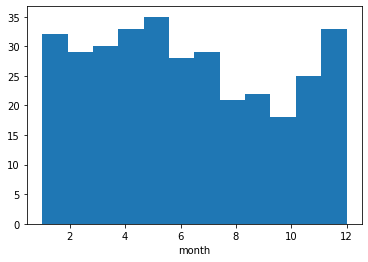

In [4]:
so.TIME.dt.month.plot.hist(bins=12)

Want:

- Group 1: months 1,2,3 (Jan,Feb,Mar)
- Group 2: months 4,5,6 (Apr,May,Jun)
- Group 3: months 7,8,9 (Jul,Aug,Sep)
- Group 4: months 10,11,12 (Oct,Nov,Dec)

In [12]:
so_1 = so.TIME.dt.month.where(so.TIME.dt.month>0).where(so.TIME.dt.month<4)
so_2 = so.TIME.dt.month.where(so.TIME.dt.month>3).where(so.TIME.dt.month<7)
so_3 = so.TIME.dt.month.where(so.TIME.dt.month>6).where(so.TIME.dt.month<10)
so_4 = so.TIME.dt.month.where(so.TIME.dt.month>9).where(so.TIME.dt.month<13)